# Vehicle Fuel Effiencey Prediction

Predict the vehicle fuel efficiency using linear regression

Dataset source: <https://archive.ics.uci.edu/ml/datasets/auto+mpg>


Import the libraries

In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as ticker

Load the dataset

In [2]:
df = pd.read_csv("dataset/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Data Summarization and Visualization

Shows the summary of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


We can see that all columns in our dataset is in numerical values, and there's some missing values in horsepower column

Check how many missing values in the dataset

In [4]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

There's 6 missing values in horsepower column, next we fill the missing values using the mean of that column

In [5]:
df = df.fillna(df['horsepower'].mean())

Generate descriptive statistics of the dataset

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [7]:
df['origin'] = df['origin'].map({1: 'USA', 2: 'europe', 3: 'japan'})

In [8]:
df = pd.get_dummies(df, columns=['origin'], prefix='', prefix_sep='')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,USA,europe,japan
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,1,0,0


In [9]:
df = df.drop(['car name'], axis=1)

In [10]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,europe,japan
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,0.486083,-0.281258,-0.321325
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
USA,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
europe,0.259022,-0.352861,-0.373886,-0.281258,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
japan,0.442174,-0.396479,-0.433505,-0.321325,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


Plot pairwise relationships in the dataset

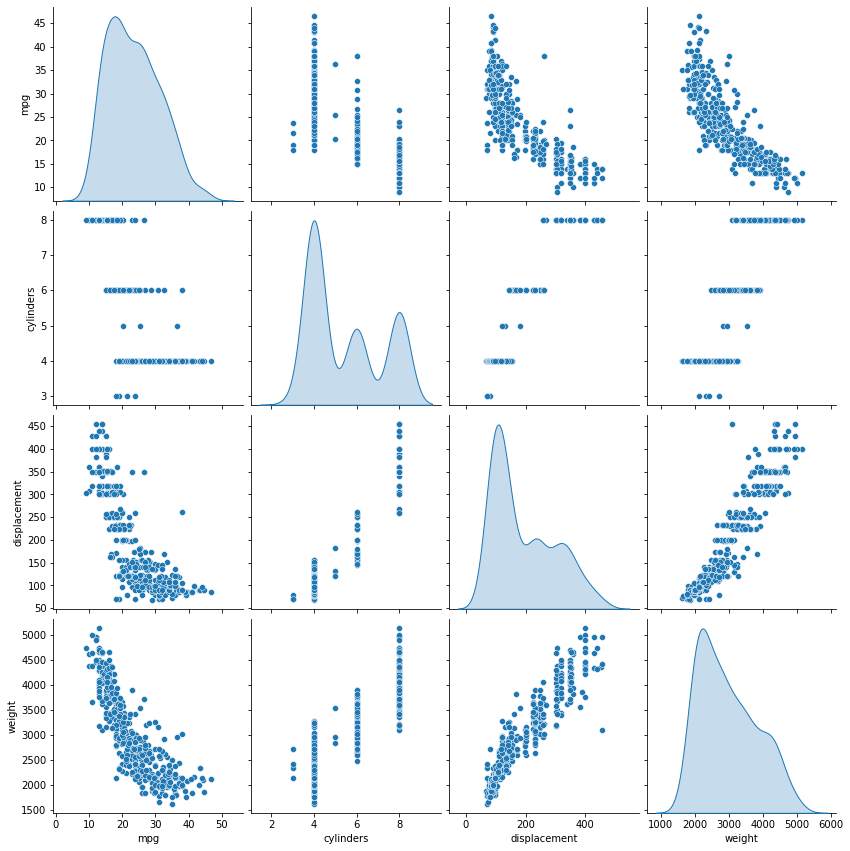

In [11]:
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'weight']], diag_kind='kde', height=3)

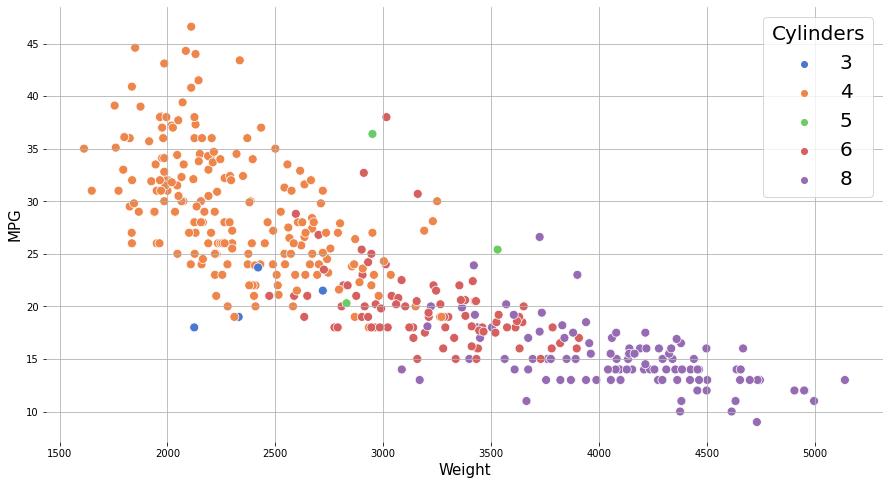

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x="weight", y="mpg", hue="cylinders", s=80, palette="muted", data=df, ax=ax)
sns.despine(fig, left=True, bottom=True)
ax.set_xlabel("Weight", size=15)
ax.set_ylabel("MPG", size=15)
ax.legend(title="Cylinders", title_fontsize=20, fontsize=20)
ax.grid()

Split the target and features column

In [13]:
X = df.drop(['mpg'], axis=1)
y = pd.DataFrame(df['mpg'].copy())

Split the training and testing set, then print the shapes of each splitted data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(318, 9) (80, 9) (318, 1) (80, 1)


In [15]:
scaler = StandardScaler()

## Model Training

Train a linear model using sklearn Linear Regression

In [16]:
regressor = LinearRegression()
#regressor.fit(X_train, y_train)

from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', scaler), ('lm', regressor)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

# Model Evaluation

Shows the regressor intercept

In [17]:
print(regressor.intercept_)

[23.6081761]


Shows the feature importance

In [18]:
importance = regressor.coef_

feature_importance = []
for i,v in enumerate(importance[0]):
	feature_importance.append([X.columns[i], v])
 
feature_importance = pd.DataFrame(feature_importance, columns=["Name", "Importance"])
feature_importance

,Name,Importance
0,cylinders,-0.275443
1,displacement,2.013660
2,horsepower,-0.493846
3,weight,-5.936123
4,acceleration,0.202367
5,model year,2.976569
6,USA,-0.768369
7,europe,0.517700
8,japan,0.435069


Plot the feature importance

Text(0, 0.5, 'Name')

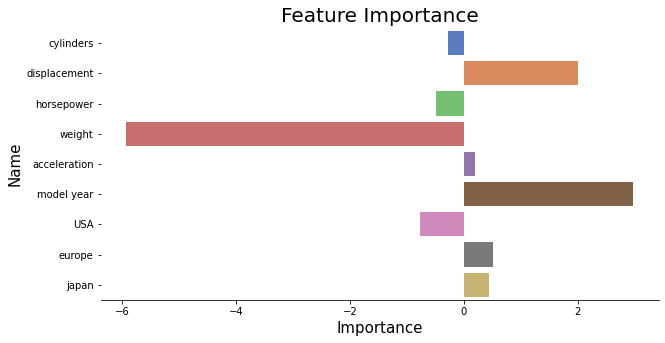

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Name'], palette="muted", ax=ax);
sns.despine(left=True)
ax.set_title("Feature Importance", fontsize=20)
ax.set_xlabel("Importance", fontsize=15)
ax.set_ylabel("Name", fontsize=15)


In [20]:
training_predicted = pipe.predict(X_train)

training_r2 = r2_score(y_train, training_predicted)
training_rmse = mean_squared_error(y_train, training_predicted, squared=False)
print(f'Training R-Squared: {training_r2:.3f}')
print(f'Training RMSE: {training_rmse:.3f}')

Training R-Squared: 0.819
Training RMSE: 3.370


In [21]:
testing_predicted = pipe.predict(X_test)

testing_r2 = r2_score(y_test, testing_predicted)
testing_rmse = mean_squared_error(y_test, testing_predicted, squared=False)

print(f'Testing R-Squared: {testing_r2:.3f}')
print(f'Testing RMSE: {testing_rmse:.3f}')

Testing R-Squared: 0.845
Testing RMSE: 2.888


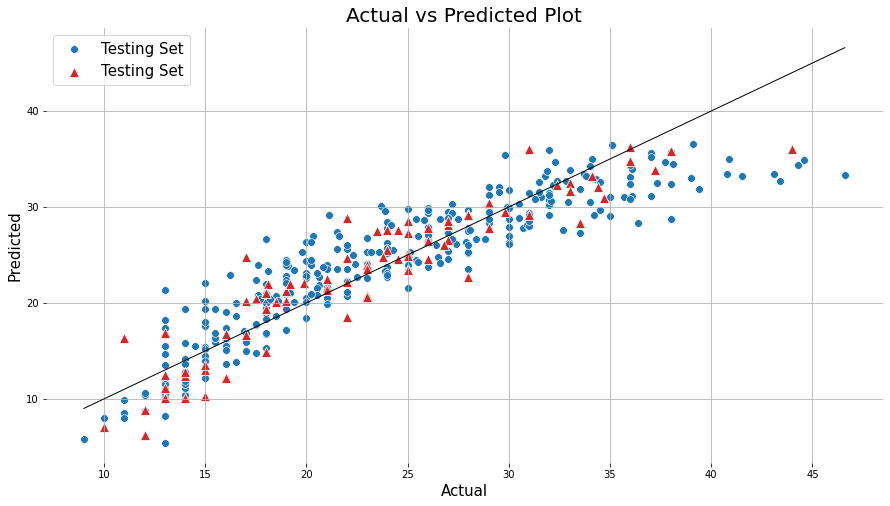

In [22]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x=y_train.values.ravel(), y=training_predicted.ravel(), s=60, color="tab:blue", label="Testing Set", ax=ax, )
sns.scatterplot(x=y_test.values.ravel(), y=testing_predicted.ravel(), s=100, marker="^", color="tab:red", label="Testing Set", ax=ax)
sns.despine(fig, left=True, bottom=True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k", lw=1)
ax.set_title("Actual vs Predicted Plot", fontsize=20)
ax.legend(loc='upper left', fontsize=15)
ax.set_xlabel("Actual", fontsize=15)
ax.set_ylabel("Predicted", fontsize=15)

ax.grid()

## Save model

In [23]:
filename = "model/vehicle_fuel_efficiency_model.sav"
joblib.dump(regressor, filename)

['model/vehicle_fuel_efficiency_model.sav']

## Conclusion

In this machine learning project, a linear regression model was developed to predict vehicle fuel efficiency. The model achieved an R-squared value of 0.819 for the training set and 0.845 for the testing set, indicating that it was able to explain a large amount of the variability in the data. Additionally, RMSE for the training set was 3.370 and for the testing set was 2.888, which indicates that the model had a low prediction error. Overall, this project demonstrated the effectiveness of linear regression in predicting vehicle fuel efficiency.